### Required Discussion 16.1: Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree

In [2]:
from sklearn.datasets import load_digits

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [3]:
churn = pd.read_csv('data/telecom_churn.csv')
digits, labels = load_digits(return_X_y=True)

In [4]:
#churn data
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
X = churn.drop(columns=['Churn'])
y = churn['Churn'].apply(lambda x: 1 if x == True else 0) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
numeric_features = ['Account length', 'Number vmail messages', 'Total day minutes', 
                    'Total day calls', 'Total day charge', 'Total eve minutes',
                    'Total eve calls', 'Total eve charge', 'Total night minutes',
                    'Total night calls', 'Total night charge', 'Total intl minutes',
                    'Total intl calls', 'Total intl charge', 'Customer service calls']

categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']


In [121]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [122]:
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [123]:
%time logistic_regression_model.fit(X_train, y_train)

CPU times: user 29.3 ms, sys: 2.73 ms, total: 32 ms
Wall time: 31 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat', OneHotEncoder(),
                                                  ['State', 'Area code',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', LogisticRegression())])

In [124]:
score = logistic_regression_model.score(X_test, y_test)
print(f"logistic regression model accuracy = {score}")

logistic regression model accuracy = 0.859


In [134]:
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [135]:
%time decision_tree_model.fit(X_train, y_train)

CPU times: user 59.9 ms, sys: 2.77 ms, total: 62.7 ms
Wall time: 61.1 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat', OneHotEncoder(),
                                                  ['State', 'Area code',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', DecisionTreeClassifier())])

In [138]:
score = decision_tree_model.score(X_test, y_test)
print(f"decision tree model accuracy = {score}")

decision tree model accuracy = 0.919


In [139]:
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [140]:
%time knn_model.fit(X_train, y_train)

CPU times: user 13.8 ms, sys: 1.79 ms, total: 15.6 ms
Wall time: 14.1 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat', OneHotEncoder(),
                                                  ['State', 'Area code',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', KNeighborsClassifier())])

In [141]:
score = knn_model.score(X_test, y_test)
print(f"KNN model accuracy = {score}")

KNN model accuracy = 0.885


In [142]:
svc_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [143]:
%time svc_model.fit(X_train, y_train)

CPU times: user 119 ms, sys: 7.46 ms, total: 127 ms
Wall time: 135 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat', OneHotEncoder(),
                                                  ['State', 'Area code',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', SVC())])

In [144]:
score = svc_model.score(X_test, y_test)
print(f"SVC model accuracy = {score}")

SVC model accuracy = 0.922


**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



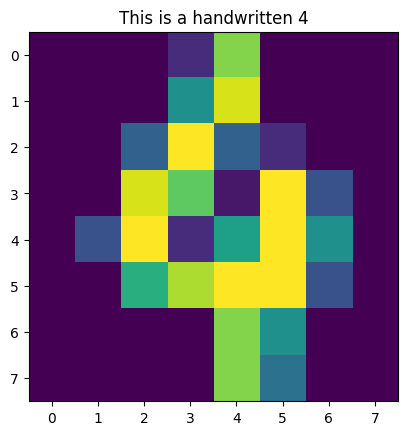

In [151]:
#example image
plt.imshow(digits[100].reshape(8, 8))
plt.title(f'This is a handwritten {labels[100]}');

In [161]:
X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size=0.3, random_state=42)

In [166]:
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [167]:
%time logistic_regression_model.fit(X_train, y_train)

CPU times: user 25.8 ms, sys: 2.64 ms, total: 28.4 ms
Wall time: 26.2 ms


Pipeline(steps=[('preprocessor', StandardScaler()),
                ('classifier', LogisticRegression())])

In [168]:
score = logistic_regression_model.score(X_test, y_test)
print(f"logistic regression model accuracy = {score}")

logistic regression model accuracy = 0.9703703703703703


In [169]:
decision_tree_model = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

In [170]:
%time decision_tree_model.fit(X_train, y_train)

CPU times: user 22.8 ms, sys: 2.41 ms, total: 25.2 ms
Wall time: 23.7 ms


Pipeline(steps=[('preprocessor', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

In [171]:
score = decision_tree_model.score(X_test, y_test)
print(f"decision tree model accuracy = {score}")

decision tree model accuracy = 0.8518518518518519


In [172]:
knn_model = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [173]:
%time knn_model.fit(X_train, y_train)

CPU times: user 5.27 ms, sys: 2.84 ms, total: 8.1 ms
Wall time: 5.48 ms


Pipeline(steps=[('preprocessor', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [174]:
score = knn_model.score(X_test, y_test)
print(f"KNN model accuracy = {score}")

KNN model accuracy = 0.975925925925926


In [175]:
svc_model = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('classifier', SVC())
])

In [176]:
%time svc_model.fit(X_train, y_train)

CPU times: user 47.1 ms, sys: 4.66 ms, total: 51.8 ms
Wall time: 51 ms


Pipeline(steps=[('preprocessor', StandardScaler()), ('classifier', SVC())])

In [177]:
score = svc_model.score(X_test, y_test)
print(f"SVC model accuracy = {score}")

SVC model accuracy = 0.9796296296296296
